<a href="https://colab.research.google.com/github/Gh0st116/Neural-networks/blob/main/regressao_nao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "rede_IF_regressao"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                28        
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 6ms/step


Text(0, 0.5, 'y')

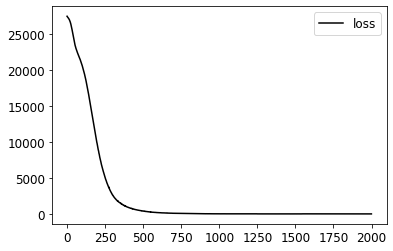

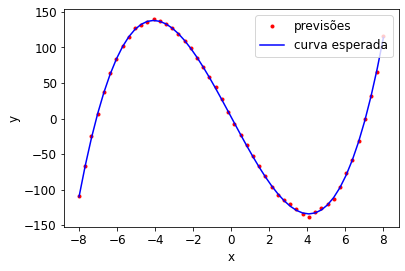

In [ ]:
#rede completa para regressão não-linear
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#define uma função da regressão
def funcao(xf):
  yf = xf**3 - 50 * xf + 2
  return yf

#criando o data set de treino e teste
s_d=200 #quantos exemplos tem meu Dtrain
s_t=50 #quantos exemplos terá meu Dtest
x_train = np.linspace(-10.0, 10.0, s_d)
y_train = funcao(x_train)
x_test = np.linspace(-8, 8, s_t)
y_test = funcao(x_test)

# criando a rede neural
model = tf.keras.Sequential(name='rede_IF_regressao')

#configurando as camadsa da rede
model.add(tf.keras.layers.Dense(14, input_dim=1, use_bias=1, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

#compilando a rede
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='mean_squared_error')
print(model.summary())

#treinando a rede
history = model.fit(x_train, y_train, epochs = 2000, verbose=0)

#mostra a performace do treinamento da rede
plt.rcParams.update({'font.size': 12})
plt.figure()
plt.plot(history.history['loss'], 'k')
plt.legend(['loss'])

#testando a rede
y_pred = model.predict(x_test)

#mostra o resultado do ajuste em relação ao esperado
plt.figure()
plt.plot(x_test,y_pred, 'r.')
plt.plot(x_test,y_test, 'b-')
plt.legend(['previsões', 'curva esperada'])
plt.xlabel('x');
plt.ylabel('y')

In [ ]:
import h5py

# salva o dataset
with h5py.File('regressao_data_set.h5', 'w') as hf:
    hf.create_dataset("xtreinamento",  data=x_train)
    hf.create_dataset("ytreinamento",  data=y_train)
    hf.create_dataset("xteste",  data=x_test)
    hf.create_dataset("yteste",  data=y_test)
    hf.create_dataset("data_info",data=[s_d,s_t])

#salva a rede
model.save("rede_IF_reg_ep_2000.h5")

dados do arquivo:  ['data_info', 'xteste', 'xtreinamento', 'yteste', 'ytreinamento']
2/2 [==============================] - 0s 6ms/step


Text(0, 0.5, 'y')

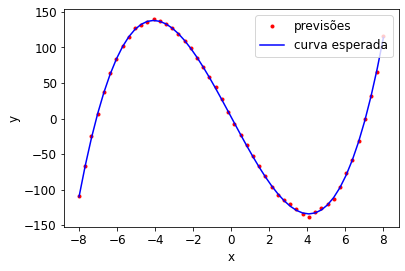

In [ ]:
import h5py

# carrega o data set
with h5py.File('regressao_data_set.h5', 'r') as hf:
    print('dados do arquivo: ', list(hf.keys()))
    [s_d,s_t] = hf['data_info'][:]
    y_train = hf['ytreinamento'][:]
    x_train = hf['xtreinamento'][:]
    x_test = hf['xteste'][:]

#carrega a rede já treinada
model = tf.keras.models.load_model("rede_IF_reg_ep_2000.h5")

#Usando a rede carregada
y_pred=model.predict(x_test)

#mostra o resultado do ajuste em relação ao esperado
plt.figure()
plt.plot(x_test,y_pred, 'r.')
plt.plot(x_test,y_test, 'b-')
plt.legend(['previsões', 'curva esperada'])
plt.xlabel('x');
plt.ylabel('y')